In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

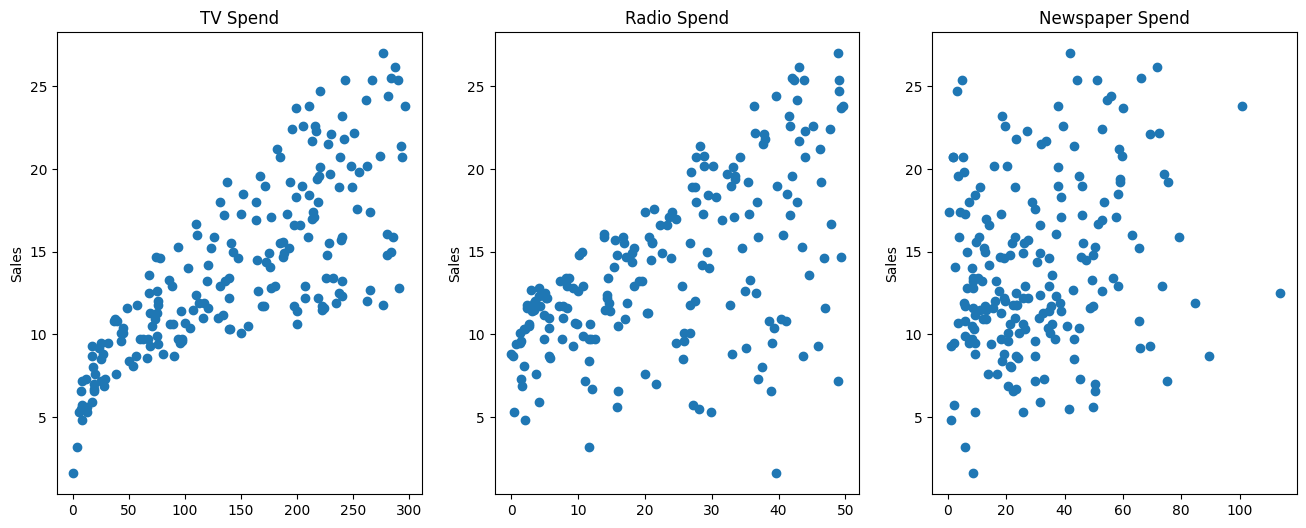

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df["TV"], df["sales"], 'o')
axes[0].set_title("TV Spend")
axes[0].set_ylabel("Sales")

axes[1].plot(df["radio"], df["sales"], 'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df["newspaper"], df["sales"], 'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

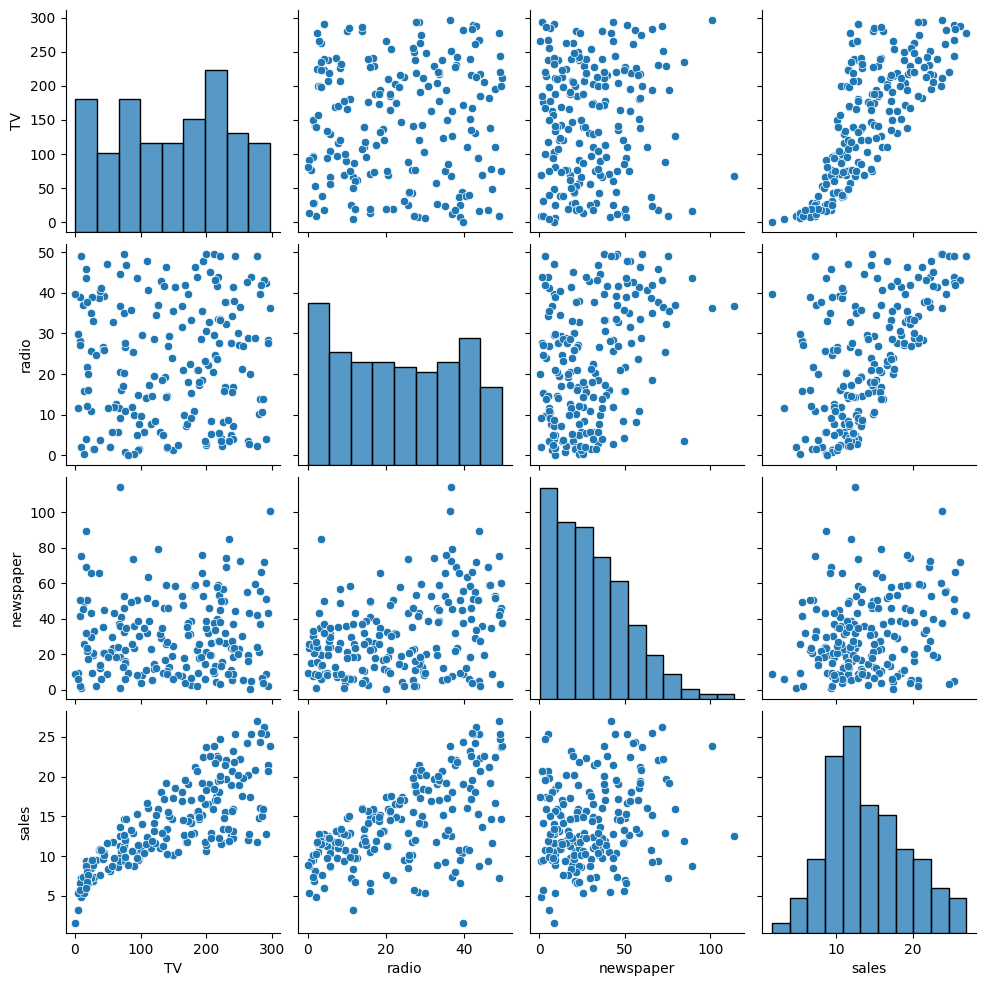

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop("sales", axis=1)

In [7]:
y = df["sales"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
test_predictions = model.predict(X_test)

In [14]:
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
df["sales"].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

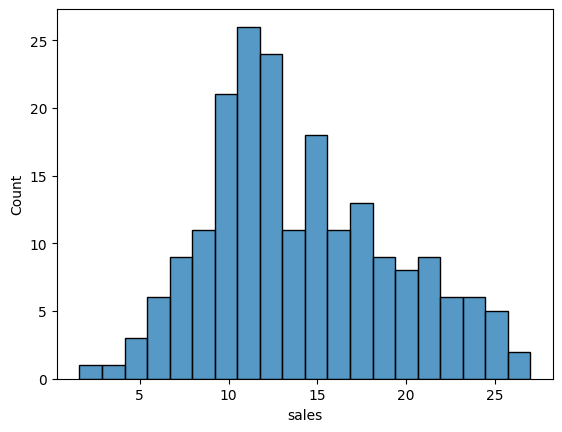

In [17]:
sns.histplot(data=df, x="sales", bins=20)

In [18]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549086

In [19]:
np.sqrt(mean_squared_error(y_test, test_predictions))

np.float64(1.9485372043446387)

In [20]:
test_residuals = y_test - test_predictions

In [21]:
#test_residuals

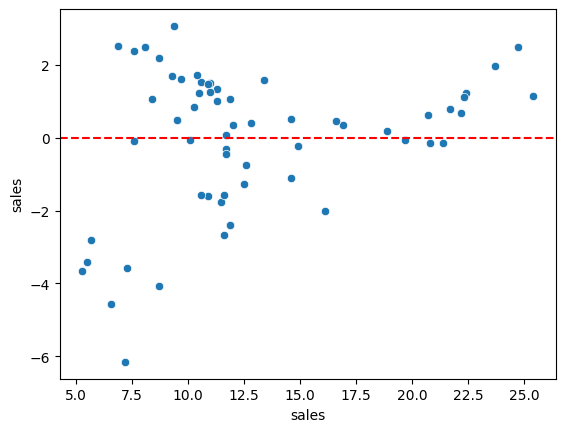

In [22]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color="r", ls="--");

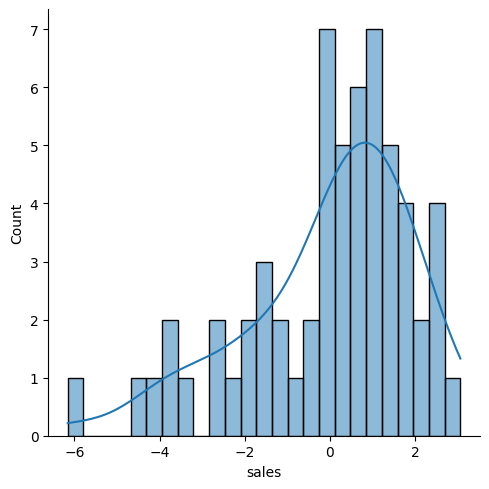

In [23]:
sns.displot(test_residuals, bins=25, kde=True)

In [24]:
import scipy as sp

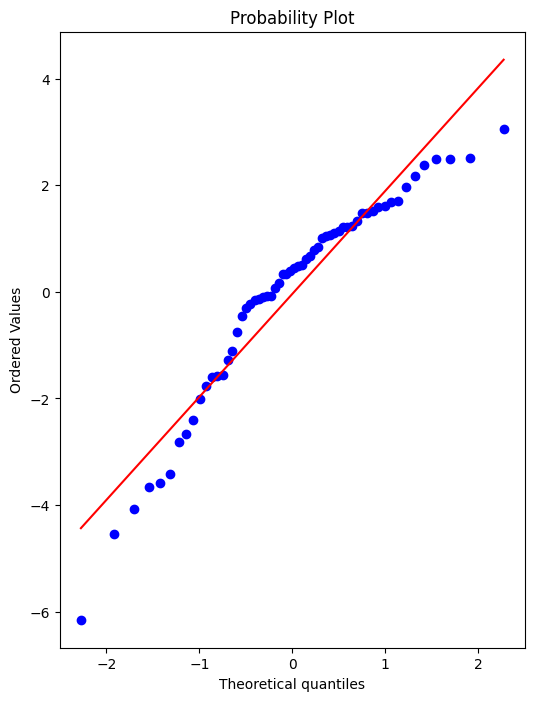

In [25]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X,y)

LinearRegression()

In [28]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [29]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
y_hat = final_model.predict(X)

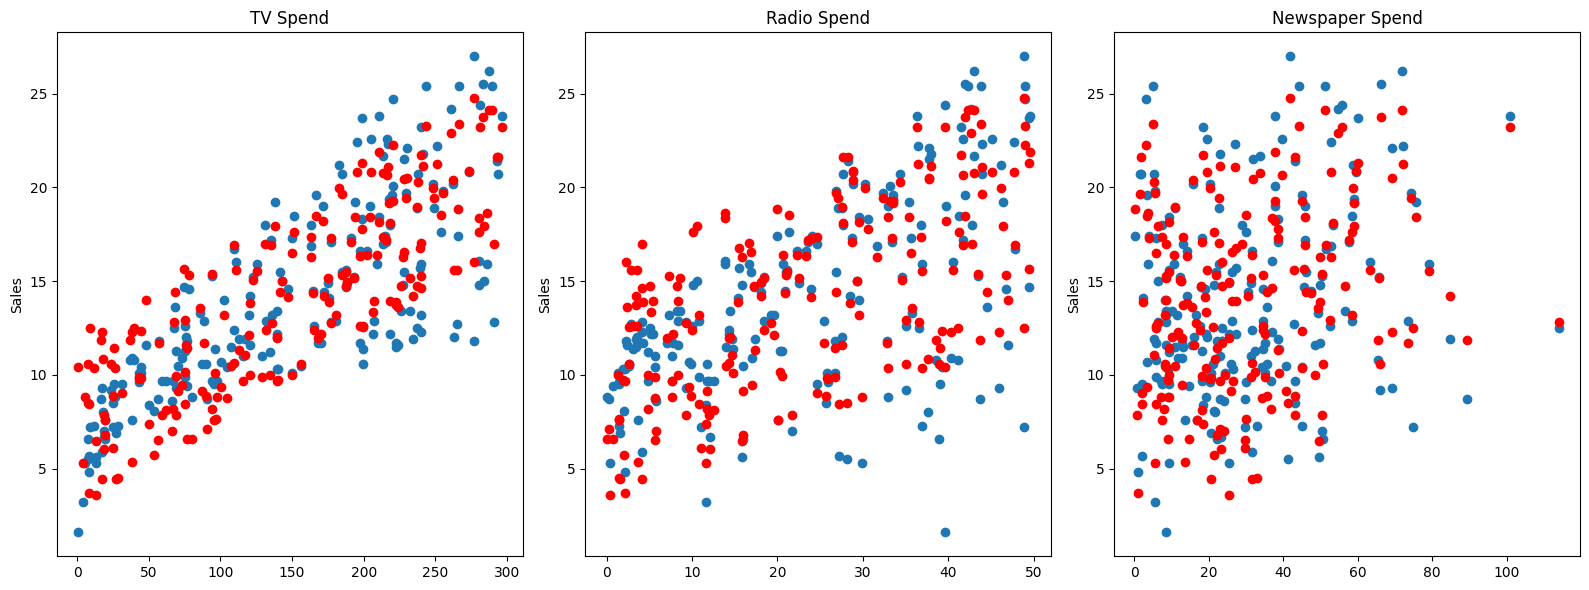

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [33]:
from joblib import dump, load

In [34]:
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [41]:
loaded_model = load("/content/final_sales_model.joblib")

In [42]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
X.shape

(200, 3)

In [44]:
campaign = [[149, 22, 12]]

In [45]:
loaded_model.predict(campaign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])